# Lab 2 : Introduction: Python, Numpy, Pandas 2025/2026

In [42]:
from os import path
import pandas as pd
import urllib
import zipfile
import sys
import urllib.request  # Modification here

url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
location = url + zipfilename

if not(path.isfile(zipfilename)):
    urllib.request.urlretrieve(location, zipfilename)

zipfile.ZipFile(zipfilename).extractall()

na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
                 na_values=na_values, usecols=fields)

## Exercice 1: Time series analysis with pandas

1) Count the number of lines with missing values. Erase all such lines.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [44]:
df.head()

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


In [45]:
df_missing=df.isnull().any(axis=1).sum()

In [46]:
print('Number of lines with missing values is: {}'.format(df_missing))

Number of lines with missing values is: 3732


With isnull() we count the number of missing values with axis=1 for the lines.

In [47]:
df.dropna(inplace=True)
df

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666
...,...,...,...
199995,4/5/2007,14:39:00,0.348
199996,4/5/2007,14:40:00,0.344
199997,4/5/2007,14:41:00,0.342
199998,4/5/2007,14:42:00,0.340


We use dropna() to remove missing values in the data frame.

2) Use the pandas functions to_datetime and set_index to set a DateTimeIndex to df. You should
first preserve the full date information, i.e. keep the hour, minute, seconds information in your
newly created DateTime. Beware, when reading dates, that the international dates format that is
different from the French standard.
What’s the advantage of having a DateTimeIndex compared to a regular index?

In [48]:
df['DateTimeIndex'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

df = df.set_index('DateTimeIndex')

df.head()

,Date,Time,Global_active_power
DateTimeIndex,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666


The DateTime format is suited for time-series analysis since it allows to do easy queries for ranges etc. with ease. Using this compared to a regular index will strengthen our code.

3) Display the graphic of daily averages, between January 1 2007 and April 30 2007. Propose an
explanation for the consumption behavior between February and early April.

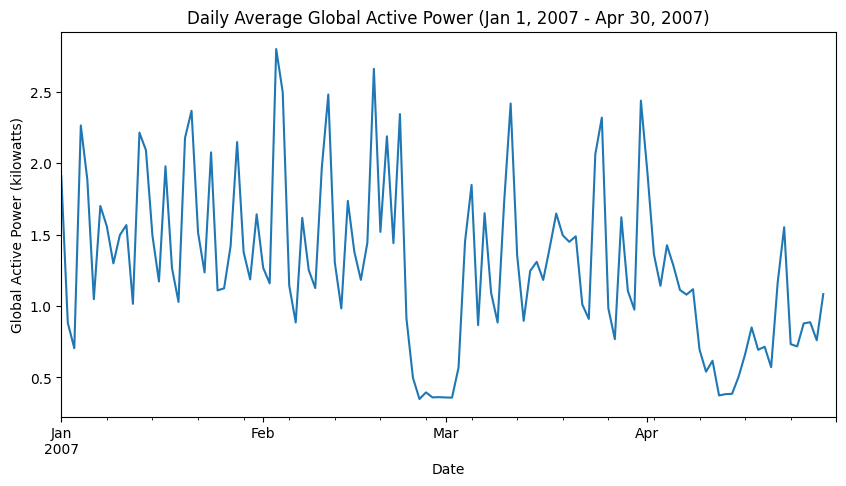

In [49]:
date_start = '2007-01-01'
date_end = '2007-04-30'
df_period = df.loc[date_start:date_end]

daily_avg = df_period['Global_active_power'].resample('D').mean()

plt.figure(figsize=(10, 5))
daily_avg.plot()
plt.title('Daily Average Global Active Power (Jan 1, 2007 - Apr 30, 2007)')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

We use variable to stock starting and ending dates, we can then plot the graphic of daily averages.

In [50]:
date_a= '2007-03-10'
df_cons=df.loc[date_a]

In [51]:
df_cons

,Date,Time,Global_active_power
DateTimeIndex,,,
2007-03-10 00:00:00,10/3/2007,00:00:00,0.296
2007-03-10 00:01:00,10/3/2007,00:01:00,0.294
2007-03-10 00:02:00,10/3/2007,00:02:00,0.296
2007-03-10 00:03:00,10/3/2007,00:03:00,0.296
2007-03-10 00:04:00,10/3/2007,00:04:00,0.298
...,...,...,...
2007-03-10 23:55:00,10/3/2007,23:55:00,2.404
2007-03-10 23:56:00,10/3/2007,23:56:00,2.396
2007-03-10 23:57:00,10/3/2007,23:57:00,2.360


We can see a brusque drop at the end of February/ beginning of March, which seems inconsistent with the consumption later in March. We can explain this by a problem in the distribution of energy at this period (2007-02-24 / 2007-03-10). We can make the hypothesis that the energy problem may have been solved on the 10th of March.

4) Load the dataset with pandas, and keep only the DATE and TG columns. Divide by 10 the TG column
to get Celsius temperature. Treat missing values as NaNs.

In [52]:
TG_df = pd.read_csv("TG_STAID011249.txt", comment='#', skipinitialspace=True)

TG_df.columns = TG_df.columns.str.strip()

TG_df = TG_df[["DATE", "TG"]]

TG_df["TG"] = TG_df["TG"].replace(-9999, pd.NA) / 10

print(TG_df.head())
TG_df.info()

       DATE   TG
0  19210301  5.0
1  19210302  4.6
2  19210303  4.6
3  19210304  3.1
4  19210305  9.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34883 entries, 0 to 34882
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    34883 non-null  int64 
 1   TG      26496 non-null  object
dtypes: int64(1), object(1)
memory usage: 545.2+ KB


5) Create a pandas Time Series with the daily temperatures between January 1 2007 and April 30 2007. Display on the same graph the temperature and the Global_active_power Time Series.
Using a twinx axis might help to display 2 series of values with different magnitudes in a readable
fashion.

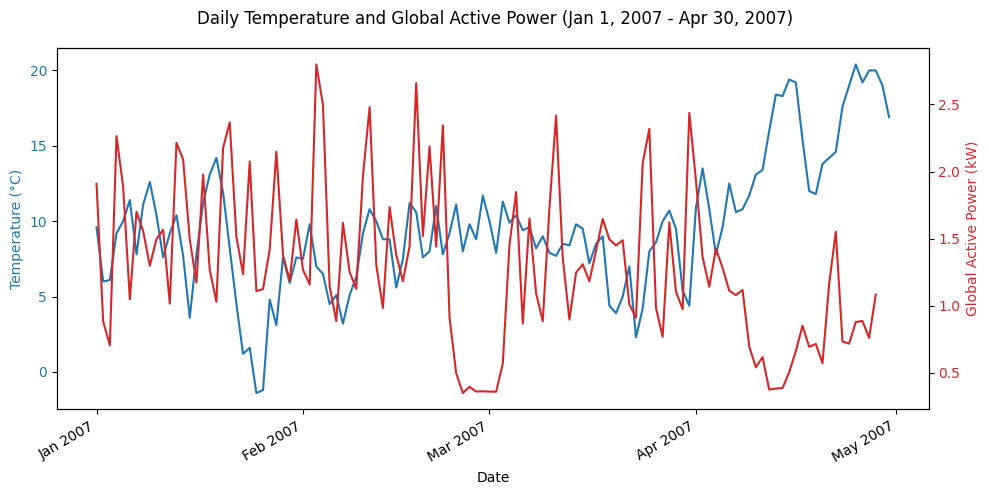

In [53]:
TG_df['DATE'] = pd.to_datetime(TG_df['DATE'], format='%Y%m%d')
TG_df = TG_df.set_index('DATE')

TG_period = TG_df.loc[date_start:date_end]

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(TG_period.index, TG_period['TG'], color='tab:blue', label='Temperature (°C)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Better formatting for x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

ax2 = ax1.twinx()
ax2.plot(daily_avg.index, daily_avg, color='tab:red', label='Global Active Power (kW)')
ax2.set_ylabel('Global Active Power (kW)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.suptitle('Daily Temperature and Global Active Power (Jan 1, 2007 - Apr 30, 2007)')
fig.tight_layout()
plt.show()

We can see a logical negative correlation between the temperature and the global active power consumption.

# Exercice 2 (Linear algebra):

6) Check this property numerically for λ = 10−5 without inverting any matrix. To compute A−1b,
never invert directly A: solve the linear system Ax= b with np.linalg.solve3, for a matrix X
whose entries are generated randomly (iid) according to a Gaussian distribution with mean zero
and variance 5, and for a vector ywith coordinates generated randomly (iid) according to a uniform
distribution over [−1,1],
(a) check it for n= 100 and p= 2000,
(b) check it for n= 2000 and p= 100.

In [54]:
lambda_ = 1e-5

In [55]:
X = np.random.normal(0, np.sqrt(5), size=(n, p))
y = np.random.uniform(-1, 1, size=n)

NameError: name 'n' is not defined

we define X Gaussian vector with mean 0 and variance 5 and y in R^n

In [ ]:
n , p = 100, 2000

for the first case, we start by computing the left side

In [ ]:
left_side= X.T @ np.linalg.solve(X @ X.T +lambda_ * np.eye(n), y)

In [ ]:
left_side

array([ 8.10309192e-04,  5.59158409e-04,  1.17623072e-03, ...,
       -2.42707423e-03,  7.28757346e-05,  1.21075588e-03])

In [ ]:
np.linalg.norm(left_side)

np.float64(0.05938356664533446)

we can now compute the right side: 

In [ ]:
right_side= np.linalg.solve(X.T @ X + lambda_ * np.eye(p), X.T @ y)

In [ ]:
np.linalg.norm(right_side)

np.float64(0.05938356664534099)

we compute the difference: 

In [ ]:
np.linalg.norm(left_side-right_side)

np.float64(2.782104166106113e-08)

We have a number very close to zero (almost zero) which verifies the property for n=100 and p=2000

We do the same for n=2000 and p=100:

In [ ]:
n, p = 2000, 100

In [ ]:
X = np.random.normal(0, np.sqrt(5), (n, p))
y = np.random.uniform(-1, 1, n)

In [ ]:
left_side2 = X.T @ np.linalg.solve(X @ X.T + lambda_ * np.eye(n), y)

In [ ]:
right_side2= np.linalg.solve(X.T @ X + lambda_ * np.eye(p), X.T @ y)

In [ ]:
np.linalg.norm(left_side2-right_side2)

np.float64(6.893623921137168e-08)

Again, we have a number extremely close to zero (almost zero), this also verfies the property for n= 2000 and p= 100

7) For a few scenarios similar to (a) and (b) (n≪p,p≪n), do a short numerical/graphical study to
compare (according to nand p) when it is more time efficient to compute the quantity in (1) using
the left hand side formulation or right hand side formulation. Explain the results.

In [ ]:
import time 

we are going to time both the letf and right formulation to see which one is more efficient:

In [ ]:
def compute_time(X, y, lambda_):
    start = time.time()
    left_side = X.T @ np.linalg.solve(X @ X.T + lambda_ * np.eye(X.shape[0]), y)
    left_time = time.time() - start

    start = time.time()
    right_side = np.linalg.solve(X.T @ X + lambda_ * np.eye(X.shape[1]), X.T @ y)
    right_time = time.time() - start

    return left_time, right_time

For the scenario n<<p with n=100 and p=2000:

In [ ]:
n, p = 100, 2000
X = np.random.normal(0, np.sqrt(5), (n, p))
y = np.random.uniform(-1, 1, n)
left_form_time1, right_form_time1= compute_time(X, y, lambda_)

In [ ]:
print('First case (n=100, p=2000) : Left =  {}s, Right = {}s'.format(left_form_time1,right_form_time1))

First case (n=100, p=2000) : Left =  0.0026848316192626953s, Right = 0.17604303359985352s


We clearly see that, for the case n<<p, the left side formulation is faster.

Now for the scenario p<<n:

In [ ]:
n, p = 2000, 100
X = np.random.normal(0, np.sqrt(5), (n, p))
y = np.random.uniform(-1, 1, n)

In [ ]:
left_form_time2, right_form_time2= compute_time(X, y, lambda_)

In [ ]:
print('Second case (n=2000, p=100) : Left = {} s, Right = {}s'.format(left_form_time2,right_form_time2))

Second case (n=2000, p=100) : Left = 0.26807403564453125 s, Right = 0.0006392002105712891s


Here, for the case p<<n, we clearly see that the right side formulation is faster.
We can conclude that the left side formulation is more appropriate for the case n<<p, whereas the right side formulation is better for the case p<<n, when both formulation gives almost the same result due to the difference of the right term and left term be almost 0.

# Exercice 3. (Random matrix spectrum)

8) Choose three non-Gaussian probability distributions, with mean 0 and variance 2, and write a
function that takes as input n, p and the distribution name, and creates a matrix X ∈Rn×p with
entries generated (iid) according to this distribution.

We choose disributions: Laplace, Uniform and rademacher to meet the conditions mean 0 and variance 2. We create a function that returns as an output a matrix X ∈ Rn×p with inputs n,p and the distribution name (laplace, uniform or rademacher). If an another distribution is selected as an input of the function, we return that the distribution is not among the 3 we selected.

In [ ]:
def fct_random_matrix(n, p, distribution_name):
    if distribution_name == 'laplace':
        #avg 0, Variance 2 * scale^2 = 2 * 1^2 = 2
        return np.random.laplace(loc=0, scale=1.0, size=(n, p))
    elif distribution_name == 'uniform':
        # avg 0, Variance (2*a)^2/12 = 2 -> a = sqrt(6)
        a = np.sqrt(6)
        return np.random.uniform(low=-a, high=a, size=(n, p))
    elif distribution_name == 'rademacher':
        # avg 0, Variance 2
        return np.sqrt(2) * np.random.choice([-1, 1], size=(n, p))
    else:
        print('Distribution is not laplace or uniform or rademacher')

In [ ]:
fct_random_matrix(10,10,'uniform')

array([[ 1.32559068,  1.83929877, -1.72484931,  2.04554042, -0.48062495,
        -2.12285177,  0.80081424, -1.8320779 ,  1.27467793, -0.11568235],
       [ 2.34495118,  1.37124213, -0.32402862, -1.23900173,  1.17398603,
        -0.80712959, -0.47354045,  1.13646639, -0.51445839,  1.57008448],
       [-2.41391239,  1.78758389,  0.98148516, -0.32639152,  1.34756401,
         0.71642118,  0.52791779, -2.16044658,  0.32791579,  1.32453251],
       [ 0.30680245, -2.25713133, -0.41738059,  1.18119962, -0.34299059,
         2.17282846, -1.49704897,  0.32390058,  2.25612056, -1.94965611],
       [-1.50097582, -0.44600356, -1.21909714,  0.86000472, -2.32484031,
        -1.36242772,  0.7646214 ,  1.02541649, -1.68721319, -2.02431183],
       [ 1.07436259, -1.74048965, -1.12747875, -0.57714802,  0.87197871,
        -0.56419084, -0.4622496 , -0.65708474, -0.41248718, -2.06969531],
       [-1.81323126,  0.98237754,  0.60774235, -1.05084839, -2.30944921,
        -1.71641133, -0.10821511,  0.92896777

In [ ]:
fct_random_matrix(10,10, 'exponential')

Distribution is not laplace or uniform or rademacher


9) Display on one single graph the singular values of X for n= 1000, and p=200,500,1000,2000 for the three distributions chosen.

In [ ]:
n = 1000
p_values = [200, 500, 1000, 2000]
distributions = ['laplace', 'uniform', 'rademacher']

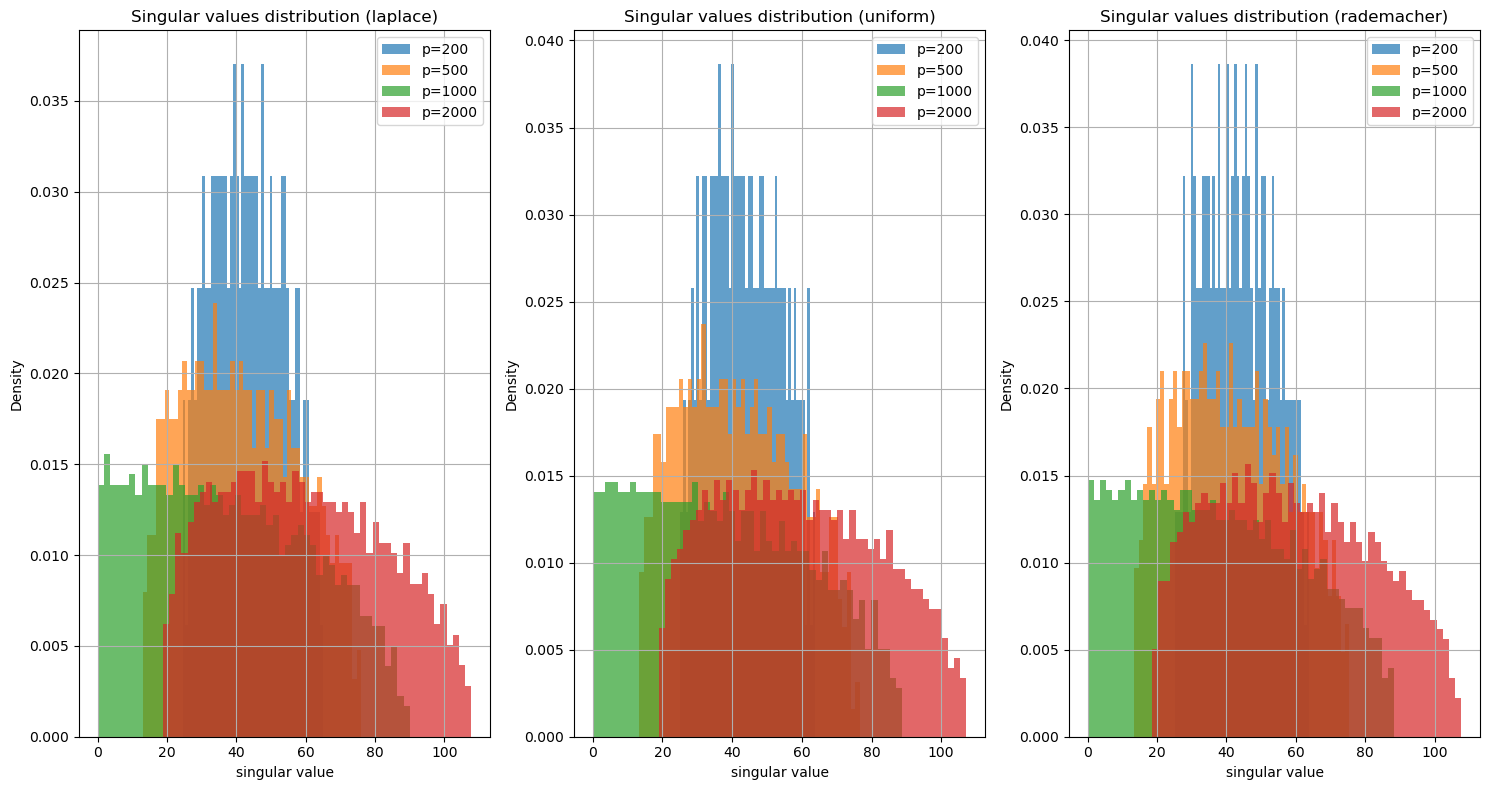

In [ ]:
plt.figure(figsize=(15, 8))
for dist in distributions:
    singular_values = {}
    for p in p_values:
        X = fct_random_matrix(n, p, dist)
        s = np.linalg.svd(X, compute_uv=False)
        singular_values[p] = s
    plt.subplot(1, len(distributions), distributions.index(dist) + 1)
    for p in p_values:
        plt.hist(singular_values[p], bins=50, density=True, alpha=0.7, label=f'p={p}')
    plt.title('Singular values distribution ({})'.format(dist))
    plt.xlabel('singular value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

10) Display on one single graph the spectrum (i.e. the set of eigen values) of X⊤X/n for n= 1000, and p= 200,500,1000,2000. Comment.

We see that the eigenvalues X⊤X/n are the squares of the singular values of X, divided by n. 

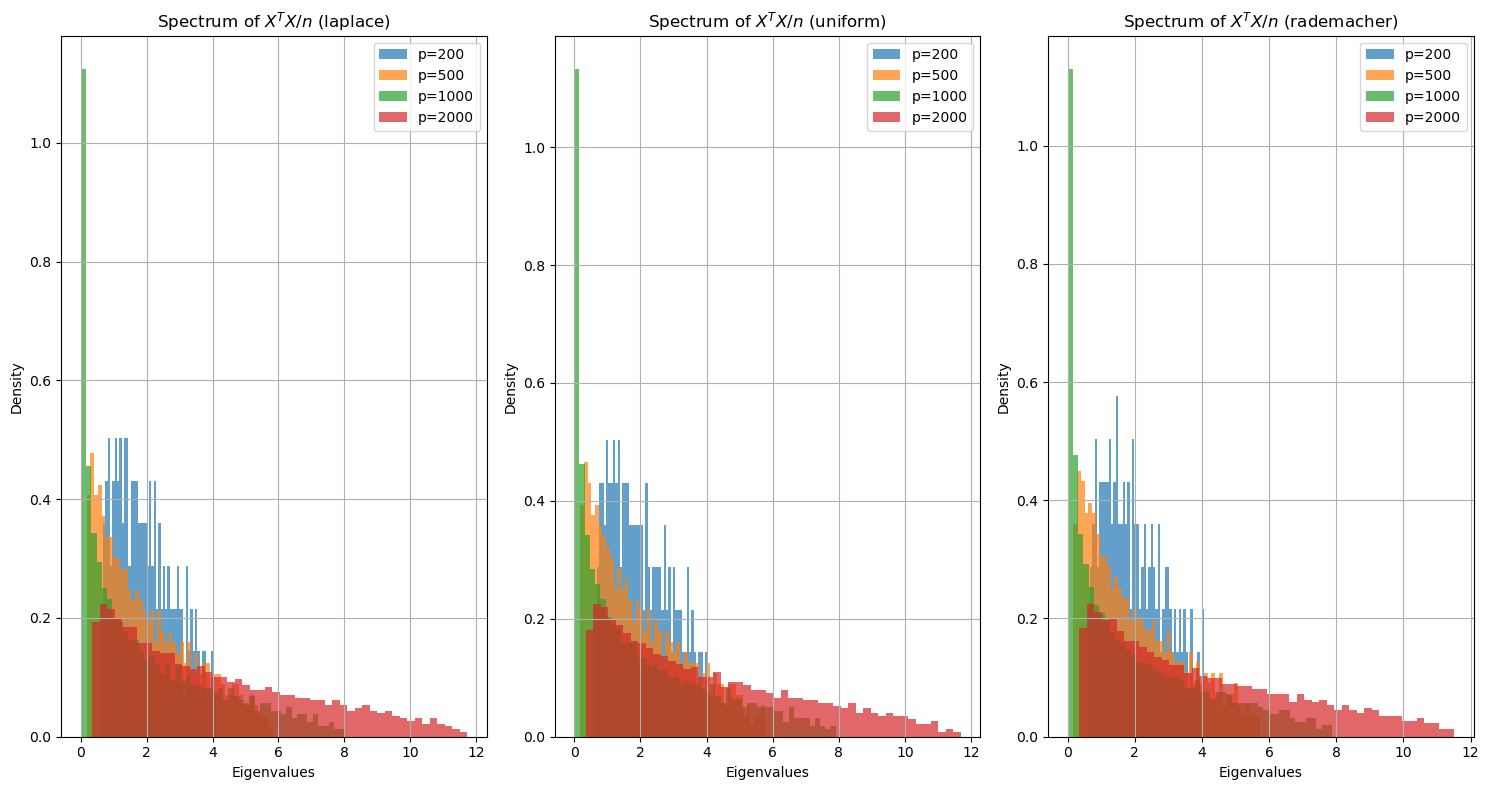

In [ ]:
plt.figure(figsize=(15, 8))

for dist in distributions:
    plt.subplot(1, len(distributions), distributions.index(dist) + 1)
    for p in p_values:
        X = fct_random_matrix(n, p, dist)
        s = np.linalg.svd(X, compute_uv=False)
        eigenvalues = (s**2) / n
        plt.hist(eigenvalues, bins=50, density=True, alpha=0.7, label=f'p={p}')
    plt.title('Spectrum of $X^T X / n$ ({})'.format(dist))
    plt.xlabel('Eigenvalues')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

We can see that regardless of the distribution input of the matrix (Laplace, uniform or randemacher), the distribution of the eigenvalues follow almost the same distribution for all 3 distributions.

# Exercice 4: Power method

In [ ]:
X = np.random.normal(loc = 0, scale = np.sqrt(5), size = (200, 400))

In [ ]:
X

array([[ 2.47641645,  1.46459492,  2.72645239, ..., -2.63711184,
         2.4140382 , -1.68773212],
       [ 0.26417845, -2.58344035,  1.9085171 , ...,  3.41908129,
        -1.86279749,  0.94778156],
       [ 0.04488341, -1.24528706,  2.79324956, ...,  0.09742091,
        -2.16953919,  3.90551468],
       ...,
       [-1.53493156,  2.07074527, -1.03561269, ..., -1.49088997,
         1.50891711,  0.56614196],
       [ 1.02026024, -0.91220834,  0.46314945, ...,  2.50444992,
         4.40637729,  6.67038092],
       [ 0.91046771,  0.22820479, -1.88060273, ..., -1.62616942,
         0.19943299,  1.47801007]], shape=(200, 400))

11) Write a function coding Algorithm 1.

In [ ]:
def algorithm_1(X, T):
  v = np.random.standard_normal(size=X.shape[1])

  for _ in range(T):
    u = X@v/np.linalg.norm(X@v)
    v = X.T@u/np.linalg.norm(X.T@u)
    
  return u,v

u_test, v_test = algorithm_1(X, 100)

#print(f"u_test: {u_test}\nv_test: {v_test}")

12) Modify the implementation of the algorithm to store all iterates of u and v. Let u∗ (resp. v∗) be
the leading left (resp. right) singular vector of X. Compute them using np.linalg.svd. Plot the
norm of uk−u∗ as a function of k. Is it true that the output u,v from the algorithm converge to
u∗,v∗? Run your code several times. Bonus: can you show it mathematically?

In [ ]:
def algorithm_2(X, T, v_0 = None):
  v_vector = []
  u_vector = []
  
  if v_0 is None:
      v = np.random.standard_normal(size=X.shape[1])
  else:
      v = v_0
  v_vector.append(v)
  
  for _ in range(T):
    u_vector.append(X@v_vector[-1]/np.linalg.norm(X@v_vector[-1]))
    v_vector.append(X.T@u_vector[-1]/np.linalg.norm(X.T@u_vector[-1]))

  return u_vector, v_vector

In [ ]:
u_vector, v_vector = algorithm_2(X, 1000)

In [ ]:
U, S, Vh = np.linalg.svd(X, full_matrices=False)
u_star = U[:, 0]
v_star = Vh[0, :]

In [ ]:
u_errors = [np.linalg.norm(u - u_star) for u in u_vector]
v_errors = [np.linalg.norm(v - v_star) for v in v_vector]

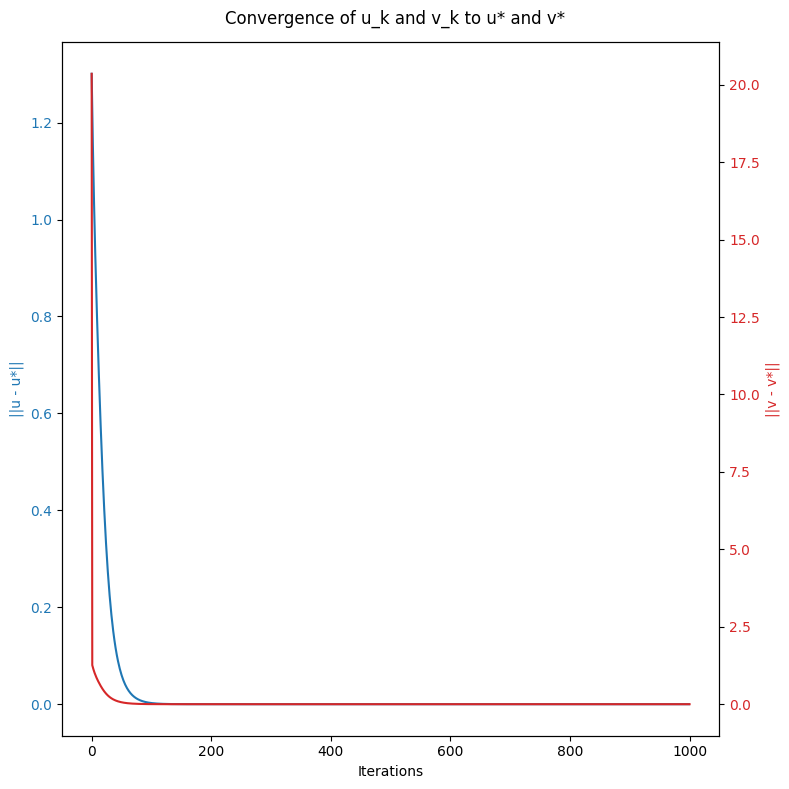

In [ ]:
fig, ax2 = plt.subplots(figsize=(8, 8))

ax2.plot(u_errors, color='tab:blue', label='u_k')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('||u - u*||', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
  
ax2 = ax2.twinx()
ax2.plot(v_errors, color='tab:red', label='v_k')
ax2.set_ylabel('||v - v*||', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.suptitle('Convergence of u_k and v_k to u* and v*')
fig.tight_layout()
plt.show()

Most of the time, we can see that $\text{lim}_{k \rightarrow \inf} |u_k - u^*| = |v_k - v^*| = 0$.

For the nathematical demonstration (cf. [Wikipedia](https://en.wikipedia.org/wiki/Power_iteration)).

13) Provide two initialization vectors $v_0$ leading to different limits for this algorithm; explain how they
are related.

In [ ]:
# Two initialization vectors v0: one is u*, the other is -u* (from SVD)
U, S, Vh = np.linalg.svd(X, full_matrices=False)
v_star = Vh[0, :]
v0_1 = v_star.copy()
v0_2 = -v_star.copy()

u_vec1, v_vec1 = algorithm_2(X, 100, v0_1)
u_vec2, v_vec2 = algorithm_2(X, 100, v0_2)

# Compare the last iterates to u*, v*
print('Final ||u1 - u*||:', np.linalg.norm(u_vec1[-1] - U[:,0]))
print('Final ||u2 - u*||:', np.linalg.norm(u_vec2[-1] - U[:,0]))
print('Final ||v1 - v*||:', np.linalg.norm(v_vec1[-1] - v_star))
print('Final ||v2 - v*||:', np.linalg.norm(v_vec2[-1] - v_star))

# Show that the two limits are opposite
print('u1[-1] ~ u*:', np.allclose(u_vec1[-1], U[:,0]))
print('u2[-1] ~ -u*:', np.allclose(u_vec2[-1], -U[:,0]))
print('v1[-1] ~ v*:', np.allclose(v_vec1[-1], v_star))
print('v2[-1] ~ -v*:', np.allclose(v_vec2[-1], -v_star))

Final ||u1 - u*||: 1.023995633068112e-14
Final ||u2 - u*||: 1.9999999999999996
Final ||v1 - v*||: 1.0579248773964039e-14
Final ||v2 - v*||: 1.9999999999999991
u1[-1] ~ u*: True
u2[-1] ~ -u*: True
v1[-1] ~ v*: True
v2[-1] ~ -v*: True


The two initialization vectors v0 = v* and v0 = -v* lead to iterates converging to u*, v* and -u*, -v* respectively.

The power method converges to the leading singular vector up to sign, so the two limits are related by a sign flip.

14) Provide a way to approximate the largest singular value of X using the power method.

In [ ]:
u_vec, v_vec = algorithm_2(X, 100)

sigma_approx = np.linalg.norm(X @ v_vec[-1])
print(f"Approximate largest singular value after 100 iterations: {sigma_approx}")

U, S, Vh = np.linalg.svd(X, full_matrices=False)
print(f"True largest singular value: {S[0]}")

Approximate largest singular value after 100 iterations: 75.31155838581982
True largest singular value: 75.31156225233175


By computing $X @ v[-1]$, we obtain a quantity that converges to the true largest singular value obtained through `np.linalg.svd()`.

15) Build upon the power method to provide an algorithm that can approximate the second largest singular value of X (without using an SVD function).

In [ ]:
def algorithm_3(X, T1=100, T2=100, v0=None):
  """Approximate first and second largest singular values of X using deflation and the power method."""
  # First singular triplet via algorithm_2
  u_vec1, v_vec1 = algorithm_2(X, T1, v0)
  u1 = u_vec1[-1]
  v1 = v_vec1[-1]
  sigma1 = np.linalg.norm(X @ v1)

  # Deflate X
  X_def = X - sigma1 * np.outer(u1, v1)

  # Second singular triplet via power method on deflated matrix
  u_vec2, v_vec2 = algorithm_2(X_def, T2)
  u2 = u_vec2[-1]
  v2 = v_vec2[-1]
  sigma2 = np.linalg.norm(X_def @ v2)

  return sigma1, sigma2, u1, v1, u2, v2

sigma1_a, sigma2_a, u1_a, v1_a, u2_a, v2_a = algorithm_3(X, T1=200, T2=200)

U, S, Vh = np.linalg.svd(X, full_matrices=False)
print(f"Power approx sigma1: {sigma1_a:.6f}, sigma2: {sigma2_a:.6f}")
print(f"SVD true sigma1: {S[0]:.6f}, sigma2: {S[1]:.6f}")

Power approx sigma1: 75.311562, sigma2: 73.686583
SVD true sigma1: 75.311562, sigma2: 73.704650


To obtain the second largest singular value of X, we need to use the deflation method. It consist of 3 steps:
- Compute Power Iteration on the first matrix.
- Remove to it $X -= \sigma_1 * $`np.outer(u1,v1)`.
- Relaunch the algorithm on te new matrix.

We see that by computing so, we obtain a value that is really near from $\sigma_2$ obtained through `np.linalg.svd()` with only 100 iterations.

## Exercice 5: Analysis of the <em>auto-mpg</em> dataset

16) Import the dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original with Pandas. Add columns name using the name parameter of read_csv and consulting: https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names. You can check the impact of using sep=r"\s+". Is there a marker for missing values in this dataset? If needed, remove the corresponding lines. The last column, car name, is not useful for our study: drop it.

In [ ]:
import shlex

names = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model_year", "origin", "car_name"
]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"

# Check impact of sep=r"\s+" vs default
try:
    pd.read_csv(url, sep=r"\s+", names=names, engine="python")
    sep_check = "ok"
except Exception as e:
    sep_check = f"error:{type(e).__name__}"
try:
    df_default = pd.read_csv(url, names=names, header=None)
    default_cols = df_default.shape[1]
except Exception as e:
    default_cols = f"error:{type(e).__name__}"
print("sep=r'\\s+' check:", sep_check, "| default sep columns:", default_cols)

# Robust load respecting quoted car_name
with urllib.request.urlopen(url) as r:
    lines = r.read().decode("utf-8", "replace").splitlines()
rows = []
for line in lines:
    line = line.strip()
    if not line:
        continue
    parts = shlex.split(line)
    if len(parts) >= 9:
        rows.append(parts[:8] + [" ".join(parts[8:])])
df = pd.DataFrame(rows, columns=names)

# Missing values and drop car_name
num = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin"]
df[num] = df[num].replace("?", pd.NA).apply(pd.to_numeric, errors="coerce")
df = df.dropna(subset=num).drop(columns=["car_name"])

df.head()

sep=r'\s+' check: error:ParserError | default sep columns: 9


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


- The separator `sep=r"\s+"` is leading to a ParserError in our program.
- There is a marker for missing values -> `NA`.


17) Add two or three binary features to meaningfully encode the three origins ('origin' feature, for which, initially, 1 stands for USA, 2 for Europe and 3 for Japan).

In [ ]:
df["origin_usa"] = (df["origin"] == 1).astype("int8")
df["origin_europe"] = (df["origin"] == 2).astype("int8")
df["origin_japan"] = (df["origin"] == 3).astype("int8")

df[["origin","origin_usa","origin_europe","origin_japan"]].sample(10)

,origin,origin_usa,origin_europe,origin_japan
134,1.0,1,0,0
68,1.0,1,0,0
125,2.0,0,1,0
225,2.0,0,1,0
248,3.0,0,0,1
189,2.0,0,1,0
16,1.0,1,0,0
245,1.0,1,0,0
231,1.0,1,0,0
9,1.0,1,0,0


18) Select (manually) 9 rows of the dataset such that all 3 origins are represented, and model year is not constant. Get the least-squares estimator ˆθ (with intercept) and the prediction vector ˆy, considering only these 9 lines. What do you observe? Why?

In [ ]:
sel = (
    df.sort_values(["origin", "model_year"]) \
      .drop_duplicates(["origin", "model_year"]) \
      .groupby("origin", group_keys=False) \
      .head(3)
)

#print(sel.head(9))  # verification

features = [
    "cylinders","displacement","horsepower","weight",
    "acceleration","model_year","origin_usa","origin_europe","origin_japan"
]
X = np.column_stack([np.ones(len(sel)), sel[features].to_numpy()])
y = sel["mpg"].to_numpy()

theta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
y_hat = X @ theta

print(f"theta shape: {theta.shape}, rank: {rank}, residual norm: {float(np.linalg.norm(y - y_hat))}")
print("y:", np.round(y,3).tolist())
print("ŷ:", np.round(y_hat,3).tolist())

theta shape: (10,), rank: 9, residual norm: 5.946480227317432e-11
y: [18.0, 28.0, 25.0, 26.0, 28.0, 23.0, 24.0, 27.0, 24.0]
ŷ: [18.0, 28.0, 25.0, 26.0, 28.0, 23.0, 24.0, 27.0, 24.0]


We observe that every estimated value is the correct one. This is due to the fact that we use the same part of the dataset, that is very small, to create and test the dataset. It is merely overfitting.

19) Now, get the least-squares estimator $\hat{\theta}$ and the prediction vector $\hat{y}$ (with intercept) over the whole dataset, after performing scaling/centering (the columns must have unit standard deviation and zero mean). Which variables seem to best explain gasoline consumption according to your model? Why wouldn’t this answer make sense if the columns were not normalized?

In [ ]:
features = [
    "cylinders","displacement","horsepower","weight",
    "acceleration","model_year","origin_usa","origin_europe","origin_japan"
]

X = df[features].copy()
X_std = (X - X.mean()) / X.std(ddof=0)
X_design = np.column_stack([np.ones(len(X_std)), X_std.to_numpy()])
y = df["mpg"].to_numpy()

theta, residuals, rank, s = np.linalg.lstsq(X_design, y, rcond=None)
y_hat = X_design @ theta

coef = pd.Series(theta[1:], index=features).sort_values(key=lambda v: v.abs(), ascending=False)

print(f"top coefficients (std X): \n{coef}")
print("y:", np.round(y[:10],1).tolist())
print("ŷ:", np.round(y_hat[:10], 1).tolist())

top coefficients (std X): 
weight          -5.692543
model_year       2.858709
displacement     2.506019
cylinders       -0.834272
origin_usa      -0.751539
horsepower      -0.699009
origin_japan     0.521830
origin_europe    0.408048
acceleration     0.217956
dtype: float64
y: [18.0, 15.0, 18.0, 16.0, 17.0, 15.0, 14.0, 14.0, 14.0, 15.0]
ŷ: [15.0, 14.0, 15.2, 15.0, 14.9, 10.9, 10.9, 10.9, 10.4, 13.3]


- Variables that best explain mpg (by |β| on standardized X): weight (most negative), model_year (positive), displacement (positive); then cylinders and horsepower (negative); origin dummies capture regional shifts; acceleration is weakest.
- Why normalize X: Without standardization, coefficient magnitudes depend on units (e.g., pounds vs. liters), so large-scale variables dominate |β| for purely numerical reasons; with zero-mean/unit-variance features, |β| reflects effect per 1 SD change and is comparable across variables.

20) Assume you observe a new car with the following values features:

| cylinders | displacement | horsepower | weight | acceleration | year | origin |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 6 | 225 | 100 | 3233 | 15.4 | 2017 | 1 |

Can you predict its consumption in this model? Beware of the year encoding.
Use a pipeline http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.
Pipeline.html for performing the rescaling and the least-squares step consecutively. Comment on the predicted y value for this car.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[features]
y = df["mpg"]

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("linreg", LinearRegression())
])
pipe.fit(X, y)

new_year = 2017 - 1900
new_row = {
    "cylinders": 6,
    "displacement": 225,
    "horsepower": 100,
    "weight": 3233,
    "acceleration": 15.4,
    "model_year": float(2017 - 1900),  # Encode consistently with dataset (year since 1900) 
    "origin_usa": 1,
    "origin_europe": 0,
    "origin_japan": 0,
}
new_X = pd.DataFrame([new_row], columns=features)
new_pred = pipe.predict(new_X)[0]

print("Predicted mpg for new car:", np.round(new_pred, 2))

Predicted mpg for new car: 53.12


- The result is of course coherent with the previous dataset. The issue we meet here is that the technology is much more different due to the year of release (2017 vs 70-82).
- That taken into account, we could imagine that on a broader dataset, the model year would maybe outweight the wieght and thus may lower the mpg prediction on this specific row.

# End.